# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [141]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

In [142]:
city_data = []
record_count = 0
set_count = 0

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#For loop for json requests
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    #Query/Responses for api
    query = (f'https://api.openweathermap.org/data/2.5/weather?units=Imperial&q={city}&appid={weather_api_key}')
    response = requests.get(query)
    response_json = response.json()
    # pprint.pprint(response_json)
    try:
        # print((f'Processing record for {city}'))
        city = (response_json['name'])
        lon = response_json['coord']['lon']
        lat = response_json['coord']['lat']
        id_response = (response_json['id'])
        max_response = (response_json['main']['temp_max'])
        hum_response = (response_json['main']['humidity'])
        cloud_response = (response_json['clouds']['all'])
        speed_response = (response_json['wind']['speed'])
        dt_response = (response_json['dt'])
        city_country = response_json['sys']['country']
        city_data.append({"City": city.title(), 
                          "Lat": lat, 
                          "Lng": lon, 
                          "Max Temp": max_response,
                          "Humidity": hum_response,
                          "Cloudiness": cloud_response,
                          "Wind Speed": speed_response,
                          "Country": city_country,
                          "Date": dt_response
})
    except:
        print("City not found!")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 0 | barrow
Processing Record 1 of Set 0 | puerto ayora
Processing Record 2 of Set 0 | rikitea
Processing Record 3 of Set 0 | illoqqortoormiut
City not found!
Processing Record 4 of Set 0 | ushuaia
Processing Record 5 of Set 0 | cape town
Processing Record 6 of Set 0 | coihaique
Processing Record 7 of Set 0 | edd
Processing Record 8 of Set 0 | lorengau
Processing Record 9 of Set 0 | kapaa
Processing Record 10 of Set 0 | hobart
Processing Record 11 of Set 0 | faya
Processing Record 12 of Set 0 | bethel
Processing Record 13 of Set 0 | mataura
Processing Record 14 of Set 0 | tuktoyaktuk
Processing Record 15 of Set 0 | aklavik
Processing Record 16 of Set 0 | hofn
Processing Record 17 of Set 0 | punta arenas
Processing Record 18 of Set 0 | sola
Processing Record 19 of Set 0 | tiksi
Processing Record 20 of Set 0 | new norfolk
Processing Record 21 of Set 0 | knysna
Processing Record 22 of Set 0 | hermanus
Pr

In [148]:
# Turn the data into a pandas DataFrame
df = pd.DataFrame(city_data)
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,42.82,87,100,10.36,US,1655932720
1,Puerto Ayora,-0.7393,-90.3518,78.76,90,59,10.00,EC,1655933253
2,Rikitea,-23.1203,-134.9692,74.95,77,39,12.10,PF,1655933254
3,Ushuaia,-54.8000,-68.3000,37.06,87,40,28.77,AR,1655933255
4,Cape Town,-33.9258,18.4232,60.12,92,88,2.30,ZA,1655933255
...,...,...,...,...,...,...,...,...,...
538,Aksha,50.2814,113.2867,57.42,75,42,6.80,RU,1655936983
539,Lerwick,60.1545,-1.1494,51.80,95,100,24.07,GB,1655936983
540,San Patricio,28.0170,-97.5169,95.18,39,4,15.12,US,1655936984
541,Vilyuysk,63.7553,121.6247,67.35,60,84,3.89,RU,1655936984


In [146]:
# Output the data to a csv
df.to_csv("../output_data/cities.csv",index_label='City_ID')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [166]:
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,42.82,87,100,10.36,US,1655932720
1,Puerto Ayora,-0.7393,-90.3518,78.76,90,59,10.00,EC,1655933253
2,Rikitea,-23.1203,-134.9692,74.95,77,39,12.10,PF,1655933254
3,Ushuaia,-54.8000,-68.3000,37.06,87,40,28.77,AR,1655933255
4,Cape Town,-33.9258,18.4232,60.12,92,88,2.30,ZA,1655933255
...,...,...,...,...,...,...,...,...,...
538,Aksha,50.2814,113.2867,57.42,75,42,6.80,RU,1655936983
539,Lerwick,60.1545,-1.1494,51.80,95,100,24.07,GB,1655936983
540,San Patricio,28.0170,-97.5169,95.18,39,4,15.12,US,1655936984
541,Vilyuysk,63.7553,121.6247,67.35,60,84,3.89,RU,1655936984


In [176]:
# Split the df into a southern hemisphere df and northern hemisphere df
df_south = df.loc[df['Lat']<= 0]
df_north = df.loc[df['Lat']>= 0]
df_north

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,42.82,87,100,10.36,US,1655932720
6,Edd,13.9297,41.6925,90.61,53,57,4.38,ER,1655933256
8,Kapaa,22.0752,-159.3190,82.38,87,100,12.66,US,1655932998
10,Faya,18.3851,42.4509,71.71,50,87,3.02,SA,1655933258
11,Bethel,41.3712,-73.4140,63.64,91,100,1.99,US,1655932923
...,...,...,...,...,...,...,...,...,...
538,Aksha,50.2814,113.2867,57.42,75,42,6.80,RU,1655936983
539,Lerwick,60.1545,-1.1494,51.80,95,100,24.07,GB,1655936983
540,San Patricio,28.0170,-97.5169,95.18,39,4,15.12,US,1655936984
541,Vilyuysk,63.7553,121.6247,67.35,60,84,3.89,RU,1655936984


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

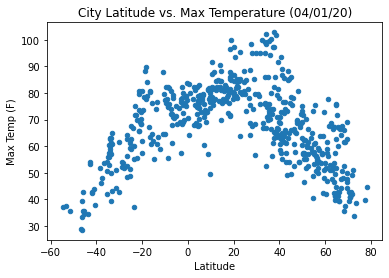

In [325]:
# plot lat v temp
lat_temp = df[['Max Temp','Lat']]
lat_temp.plot(x= 'Lat',y='Max Temp',kind='scatter',title='City Latitude vs. Max Temperature (04/01/20)',
             xlabel = 'Latitude',ylabel = 'Max Temp (F)')
plt.savefig("../output_data/Lat_vs_Temp.png")

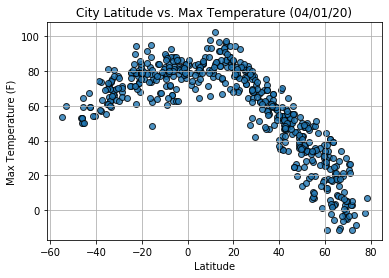

## Latitude vs. Humidity Plot

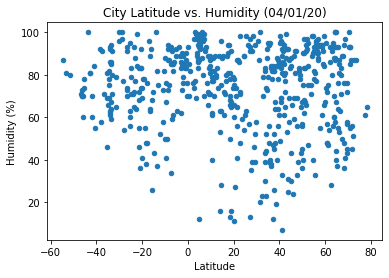

In [326]:
# plot lat v humidity
lat_hum = df[['Lat','Humidity']]
lat_hum.plot(kind='scatter',x='Lat',y='Humidity',ylabel='Humidity (%)',xlabel='Latitude',title='City Latitude vs. Humidity (04/01/20)')
plt.savefig("../output_data/Lat_vs_Humidity.png")

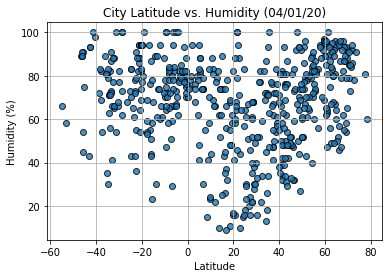

## Latitude vs. Cloudiness Plot

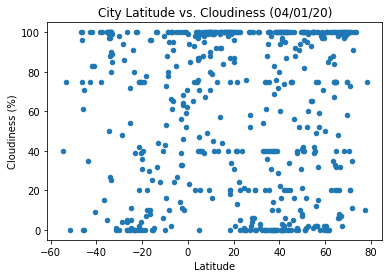

In [327]:
# plot lat v cloudiness
lat_cloud = df[['Cloudiness','Lat']]
lat_cloud.plot(kind='scatter',x='Lat',y='Cloudiness',title='City Latitude vs. Cloudiness (04/01/20)',xlabel='Latitude',ylabel='Cloudiness (%)')
plt.savefig("../output_data/Lat_vs_Cloud.png")

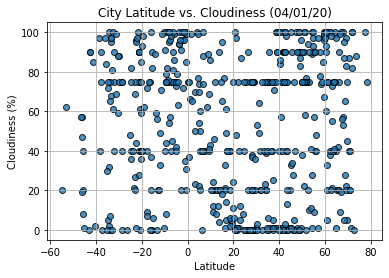

## Latitude vs. Wind Speed Plot

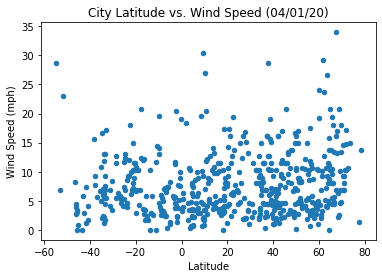

In [328]:
# plot lat v wind
lat_speed = df[['Lat','Wind Speed']]
lat_speed.plot(kind='scatter',x='Lat',y='Wind Speed',title='City Latitude vs. Wind Speed (04/01/20)',xlabel='Latitude',ylabel='Wind Speed (mph)')
plt.savefig("../output_data/Lat_vs_Wind.png")

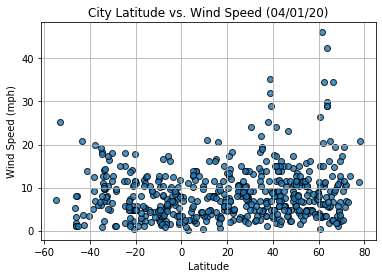

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6684998222604199


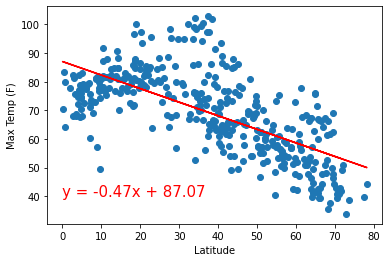

<Figure size 432x288 with 0 Axes>

In [339]:
# plot north lat v temp and regression line and equation
lat_temp = df_north[['Max Temp','Lat']]
y_values = lat_temp['Max Temp']
x_values = lat_temp['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.show()
# save plot as png
plt.savefig("../output_data/North_Lat_vs_Temp.png")

The r-value is: 0.46937863826630627


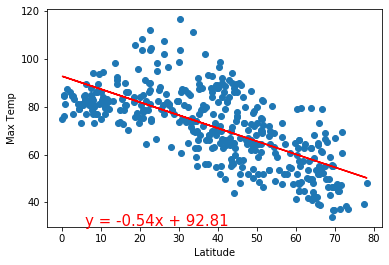

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7998388304720419


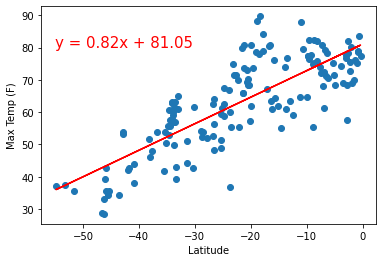

<Figure size 432x288 with 0 Axes>

In [330]:
# plot south lat v temp and regression line and equation
lat_temp = df_south[['Max Temp','Lat']]
y_values = lat_temp['Max Temp']
x_values = lat_temp['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.show()
# save plot as png
plt.savefig("../output_data/South_Lat_vs_Temp.png")

The r-value is: 0.6082708688906918


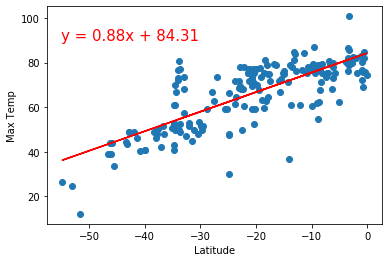

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.07168700087593605


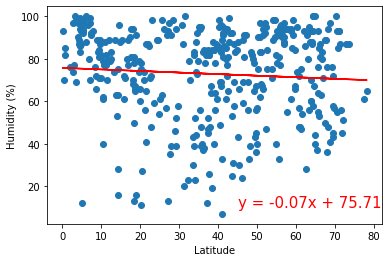

<Figure size 432x288 with 0 Axes>

In [331]:
# plot north lat v hum and regression line and equation
lat_hum = df_north[['Lat','Humidity']]
y_values = lat_hum['Humidity']
x_values = lat_hum['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()
# save plot as png
plt.savefig("../output_data/North_Lat_vs_Hum.png")

The r-value is: 0.000543987878808455


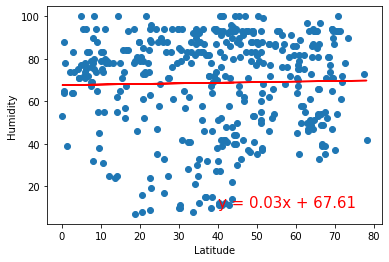

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.026812758257167224


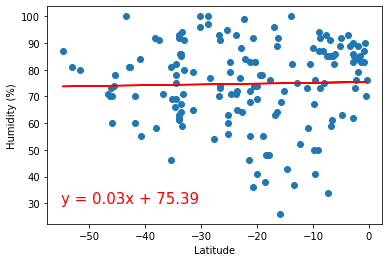

<Figure size 432x288 with 0 Axes>

In [332]:
# plot south lat v hum and regression line and equation
lat_hum = df_south[['Lat','Humidity']]
y_values = lat_hum['Humidity']
x_values = lat_hum['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()
# save plot as png
plt.savefig("../output_data/South_Lat_vs_Hum.png")

The r-value is: 0.014985174297345524


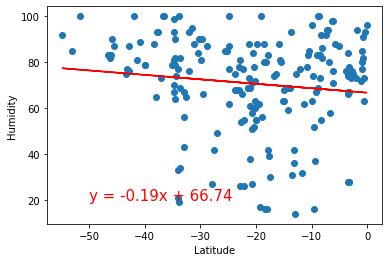

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.11146725405972222


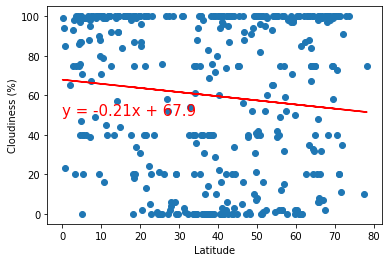

<Figure size 432x288 with 0 Axes>

In [333]:
# plot north lat v cloudiness and regression line and equation
lat_cloud = df_north[['Lat','Cloudiness']]
y_values = lat_cloud['Cloudiness']
x_values = lat_cloud['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()
# save plot as png
plt.savefig("../output_data/North_Lat_vs_Cloud.png")

The r-value is: 0.0020898727664228514


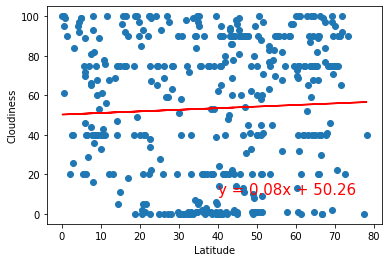

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.07302071973631528


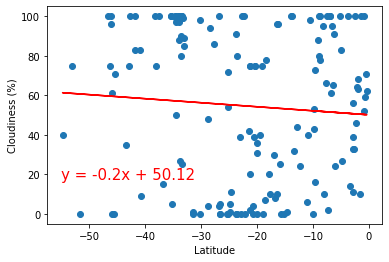

<Figure size 432x288 with 0 Axes>

In [334]:
# plot south lat v cloudiness and regression line and equation
lat_cloud = df_south[['Lat','Cloudiness']]
y_values = lat_cloud['Cloudiness']
x_values = lat_cloud['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(-55,17.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()
# save plot as png
plt.savefig("../output_data/South_Lat_vs_Cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.19110021578889533


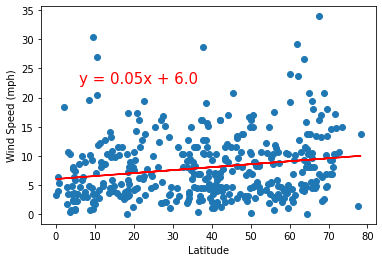

<Figure size 432x288 with 0 Axes>

In [335]:
# plot north lat v wind and regression line and equation
lat_cloud = df_north[['Lat','Wind Speed']]
y_values = lat_cloud['Wind Speed']
x_values = lat_cloud['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(5.8,22.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()
# save plot as png
plt.savefig("../output_data/North_Lat_vs_Wind.png")

The r-value is: 0.04019723576144484


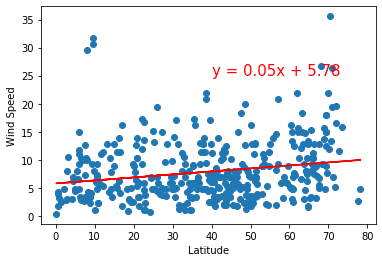

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.05604929142526189


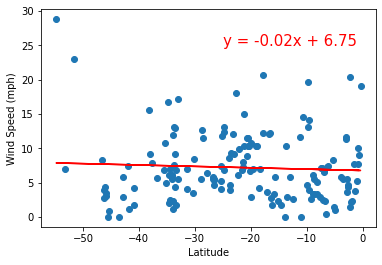

<Figure size 432x288 with 0 Axes>

In [336]:
# plot south lat v wind and regression line and equation
lat_cloud = df_south[['Lat','Wind Speed']]
y_values = lat_cloud['Wind Speed']
x_values = lat_cloud['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()
# save plot as png
plt.savefig("../output_data/South_Lat_vs_Wind.png")

The r-value is: 0.017128274759839232


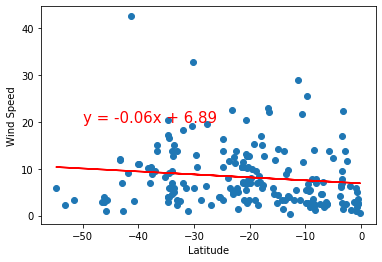